# Visualization tutorial
## Static visualization
The tutorial covers the basic visualization options from EyeFeatures. First of all, we are importing all the methods that we need.

In [1]:
from eyefeatures.visualization.static_visualization import scanpath_visualization, get_visualizations
import pandas as pd

Now, let's load example data with the prepared AOI definition and look at the columns in it:<br>
* ```SUBJ_NAME``` — id of the participant
* ```TEXT``` — label of the text
* ```norm_pos_x``` — normalized x-axis coordinate of the fixation [0, 1]
* ```norm_pos-y``` — normalized y-axis coordinate of the fixation [0, 1]
* ```duration``` — duration of the fixation in ms
* ```AOI``` - the label of the AOI to which the fixation belongs

In [2]:
data = pd.read_csv('../data/aoi/em-y35-fasttext_AOI.csv')
x = "norm_pos_x"
y = "norm_pos_y"
aoi = "AOI"
duration = "duration"
data[y] = 1 - data[y]   # Reverse the y-axis coordinates
data.head()

,SUBJ_NAME,TEXT,norm_pos_x,norm_pos_y,duration,to_filter,AOI,best_method
0,s01,aide_refugies-a1,-0.259043,1.050774,119,s01_aide_refugies-a1,aoi_2,KMeans
1,s01,aide_refugies-a1,-0.172329,1.043732,172,s01_aide_refugies-a1,aoi_2,KMeans
2,s01,aide_refugies-a1,-0.033891,1.041002,103,s01_aide_refugies-a1,aoi_1,KMeans
3,s01,aide_refugies-a1,0.150820,1.028931,236,s01_aide_refugies-a1,aoi_0,KMeans
4,s01,aide_refugies-a1,0.117732,1.031087,173,s01_aide_refugies-a1,aoi_0,KMeans


## Scanpath Visualization

### Baseline
It is the main function of the visualization module. It has a lot of parameters, and you can adjust it to your needs. We will learn only the basics of setting up for a quick start. Let's begin with the baseline. We will try to visualize saccades with fixations.

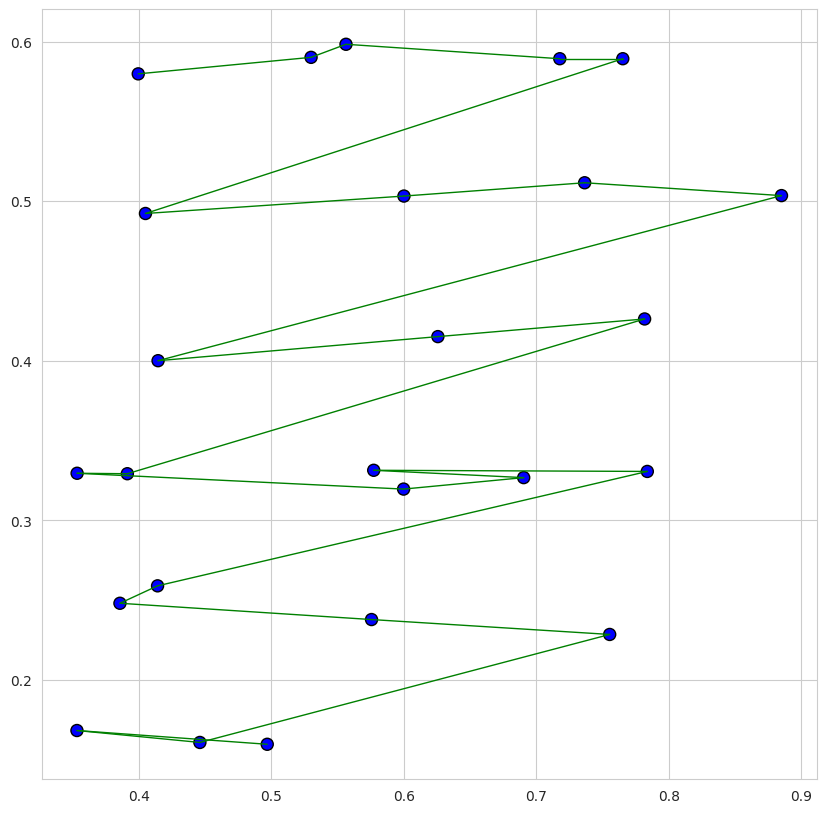

In [3]:
record = data[(data['SUBJ_NAME'] == "s04") & (data['TEXT'] == "chasse_oiseaux-a1")]
scanpath_visualization(record, x, y, return_ndarray=False, with_axes=True, path_width=1)

The first argument is the instance with fixations; the following two arguments are the names of columns, which contain x- and y-axis coordinates, respectively. Also, we want to see a plot with axes (with_axes=True), and we set the line width. This function returns a ndarray with RGB, but we will look at this in the next paragraph.

### Saccadic information
We can modify the previous plot and get a presentable plot with more information. Let's add enumeration for fixations, sequentially-colored saccades, regression, and vectors instead of regular lines. 

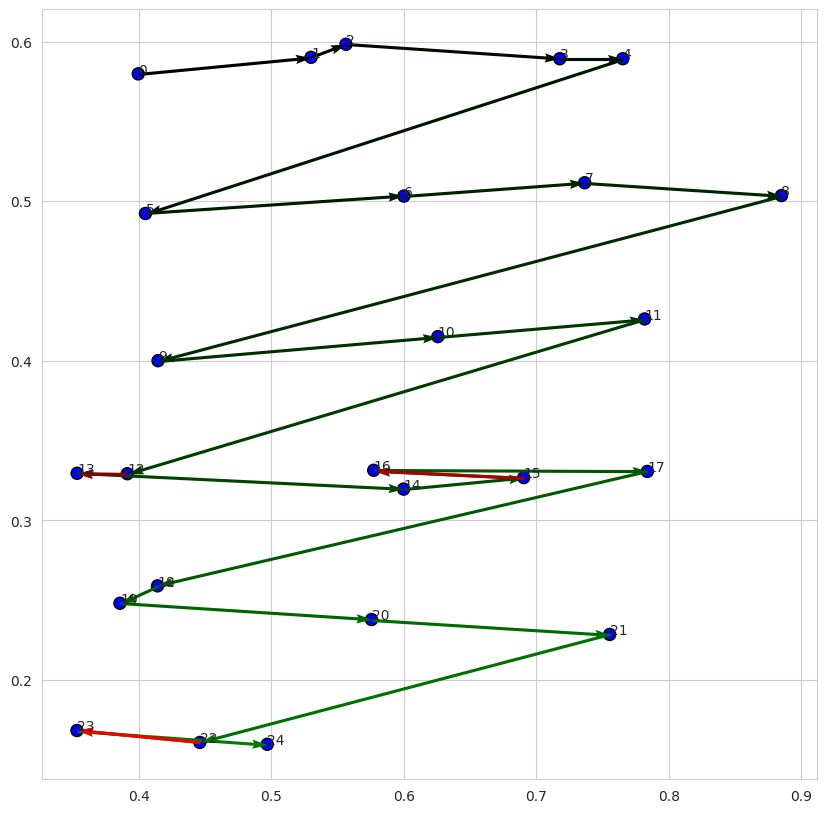

In [4]:
scanpath_visualization(record, x, y, add_regressions=True, regression_color='red', seq_colormap=True, is_vectors=True, points_enumeration=True, rule=(2, ), return_ndarray=False, with_axes=True)

### How to add regression
If you want to add regression to the plot, you should add a rule parameter. In this example, we selected the second quadrant for regression. You can also choose other quadrants or interpret it as an angle in radians. The part below is a description of these parameters from the doc string: <br><br>
```rule``` must be either:
1) tuple of quadrants direction to classify
            regressions, 1st quadrant being upper-right square of plane and counting
            anti-clockwise or 
2) tuple of angles in degrees (0 <= angle <= 360).<br>

```deviation``` if None, then `rule` is interpreted as quadrants. Otherwise,
            `rule` is interpreted as angles. If integer, then is a +-deviation for all angles.
            If tuple of integers, then must be of the same length as `rule`, each value being
            a corresponding deviation for each angle. Angle = 0 is positive x-axis direction,
            rotating anti-clockwise.

### AOI visualization
Our fixations have the AOI. Let's visualize it. It is simple, you should add the name of the AOI column in the ```aoi``` parameter. Areas were calculated using a convex hull (To visualize areas, add ```show_hull=True```). To make the plot simpler, we will drop the saccades (```only_points=True```).

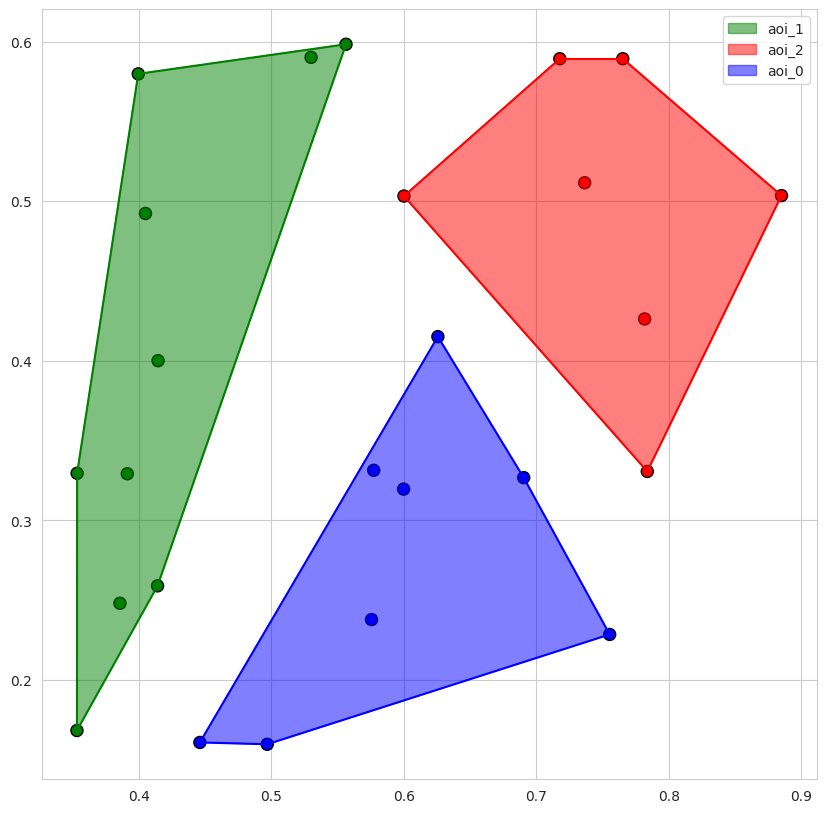

In [5]:
aoi_color = {"aoi_0": "blue", "aoi_1": "green", "aoi_2": "red"}
scanpath_visualization(record, x, y, aoi=aoi, aoi_c=aoi_color, return_ndarray=False, with_axes=True, only_points=True, show_legend=True, show_hull=True)

### Visualization of the fixations
Now we will visualize only fixation, but with extra information. We will add different shapes that depend on the duration of the fixation (```shape_column=duration```). 

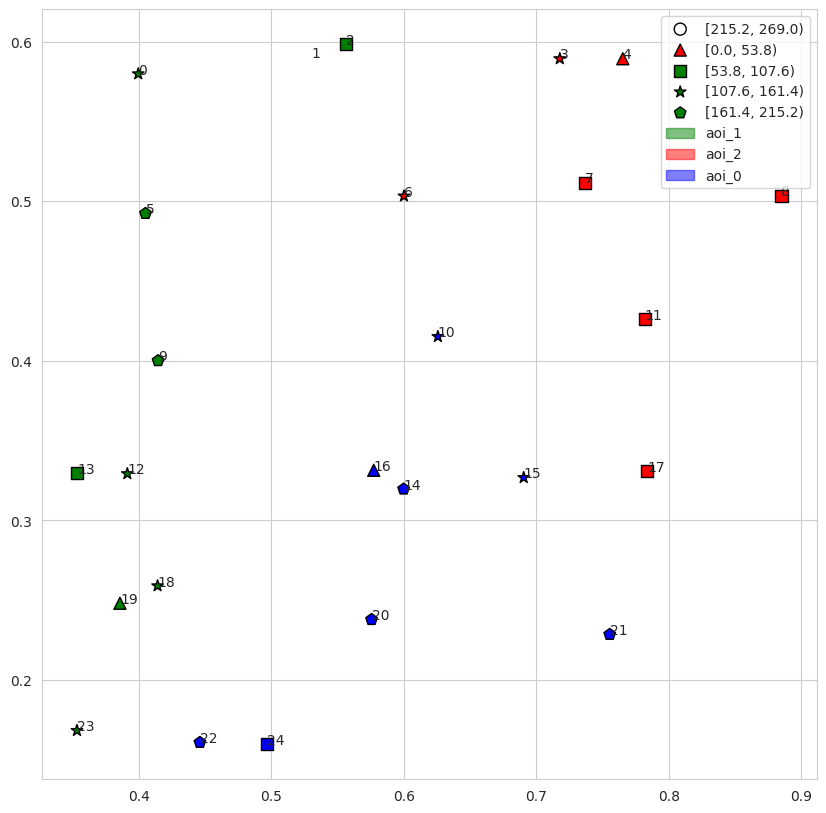

In [6]:
scanpath_visualization(record, x, y, shape_column=duration, aoi=aoi, aoi_c=aoi_color, show_legend=True, points_enumeration=True, only_points=True, return_ndarray=False, with_axes=True)

To sum up, it is possible to change the AOI color, the width of the saccades, add a path to save the plot, etc.
<br>
All these types of plots are available, like a particular function with a lower count of parameters: ```baseline_visualization```, ```aoi_visualization```, ```saccade_visualization```.
> Remark: Most of the visualization methods were taken from this article [[1]](#links)

## Get visualizations
If we want to use plot images for DL, we can use ```get_visualizations``` for it. It returns a ndarray of RGB (or gray) values of the image plot of each record. ```pk``` parameter needs to split records. ```pattern``` is a name for a possible visualization (```baseline```, ```aoi```, ```saccades```).

In [7]:
pk = ["SUBJ_NAME", "TEXT"]
res = get_visualizations(record, x=x, y=y, shape=(10, 10), pk=pk, pattern="saccades", dpi=4)
res[0]

100%|██████████| 1/1 [00:00<00:00, 36.61it/s]

(1, 3, 40, 40)


array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]])

## Dynamic visualization
Visualization module also has some dynamic visualization with animations. It could be useful for deep learning like static visualization, but it can be used to interpretation of data. Let's import all function and build our first animation of scanpath:

In [8]:
from eyefeatures.visualization.dynamic_visualization import *

### Scanpath animation
Firstly, we will animate building of the scanpath. ```scanpath_animation``` function has main parameters like other visualization function: <br>
* data — fixations with additional information
* x — column name of the x-axis coordinate
* y — column name of the y-axis coordinate <br>

and e.t.c
You can also adjust speed of the animation using ```duration``` parameter(duration in ms) and save animation in gif file with ```save_gif=path/to/the/gif```


In [9]:
scanpath_animation(record, x=x, y=y, add_regression=True, rule=(2,), animation_duration=500, save_gif="scanpath.gif")

## Tracker animation
You can also animate the movement of the tracker on screen. This function has the same parameters as the previous function, but this also can color the fixations due to the label in the AOI columns. Moreover, you can add extra data to the fixation, for example, duration.

In [10]:
aoi_color["aoi_2"] = "yellow"
tracker_animation(record, x=x, y=y, add_regression=True, rule=(2,), animation_duration=500, aoi=aoi, aoi_c=aoi_color, meta_data=[duration], save_gif="tracker.gif")

## Links
* [[1]](#links) SEAN ANTHONY BYRNE, MoMiLab, VIRMARIE MAQUILING, ADAM PETER FREDERICK REYNOLDS, LUCA POLONIO, NORA CASTNER, ENKELEJDA KASNECI. Exploring the Effects of Scanpath Feature Engineering for Supervised Image Classification Models. 2023. https://doi.org/10.1145/3591130